In [1]:
import pandas as pd
import numpy as np

In [17]:
wash_data = pd.read_csv('./wash.csv', header=None)
brush_data = pd.read_csv('./brush.csv', header=None)
walk_data = pd.read_csv('./walk.csv',header=None)
eat_data = pd.read_csv('./eat.csv', header=None)
sit_data = pd.read_csv('./sit.csv', header=None)
stand_data = pd.read_csv('./stand.csv', header=None)

In [18]:
wash_data[16] = 0
brush_data[16] = 1
walk_data[16] = 2
eat_data[16] = 3
sit_data[16] = 4
stand_data[16] = 5

In [19]:
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()


#wash_arr.shape, brush_arr.shape, walk_arr.shape, eat_arr.shape

In [20]:
tot_data = np.concatenate((wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
tot_data.shape

(4089, 17)

In [21]:
train_x = tot_data[:,:-1]

In [22]:
train_y = tot_data[:,-1:]

In [ ]:
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]

# none standard scaler

스케일링도 계산이기 때문에 스케일링을 안했을 때, 정확도가 높게 나온다면 스케일링 진행 x

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [24]:
from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

In [25]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

In [26]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1979,    2,    0,    1,    0,    0],
       [  15, 1591,    0,    4,    0,    3],
       [   1,    0,  142,    0,    0,    0],
       [   2,    7,    0,  201,    0,    0],
       [   0,    0,    0,    0,   38,   20],
       [   0,    1,    0,    0,    0,   82]], dtype=int64)

* sit, stand 를 합쳐서 진행하는 것도 좋을 것 같음.
* 두개를 자세히 구분할 필요 없음 

In [30]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[527] = { 0 };
    double decisions[15] = { 0 };
    int votes[6] = { 0 };
        kernels[0] = compute_kernel(x,   10.08  , 6.05  , 2.05  , 7.56  , 1.11  , 0.81  , 1.75  , -0.31  , -1.06  , 0.14  , -0.34  , -0.75  , 0.07  , 0.18  , -0.21  , -0.37 );
        kernels[1] = compute_kernel(x,   10.6  , -4.07  , 6.46  , 5.22  , 5.32  , 1.07  , 3.62  , 0.05  , 0.17  , -13.37  , 0.01  , 0.04  , -0.69  , 0.15  , 0.25  , -1.28 );
        kernels[2] = compute_kernel(x,   11.53  , 6.69  , 4.21  , 6.16  , 0.95  , 4.63  , 5.2  , 1.4  , 22.27  , 1.16  , 0.32 

커널의 개수 약 526개 -> m0 에 올리기에 부담이 감 -> 모델을 줄이거나, feature 줄이거나, 클래스 줄임

## stand, sit -> 합침
* 클래스의 개수가 줄으면 커널의 수가 주는 듯 함

클래스를 줄임 -> svm 커널 개수 줄음

In [31]:
wash_data[16] = 0
brush_data[16] = 1
walk_data[16] = 2
eat_data[16] = 3
sit_data[16] = 4
stand_data[16] = 4

In [32]:
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
tot_data.shape

(4089, 17)

In [33]:
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

In [35]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1979,    2,    0,    1,    0],
       [  15, 1591,    0,    4,    3],
       [   1,    0,  142,    0,    0],
       [   2,    7,    0,  201,    0],
       [   0,    1,    0,    0,  140]], dtype=int64)

In [36]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[449] = { 0 };
    double decisions[10] = { 0 };
    int votes[5] = { 0 };
        kernels[0] = compute_kernel(x,   10.08  , 6.05  , 2.05  , 7.56  , 1.11  , 0.81  , 1.75  , -0.31  , -1.06  , 0.14  , -0.34  , -0.75  , 0.07  , 0.18  , -0.21  , -0.37 );
        kernels[1] = compute_kernel(x,   10.6  , -4.07  , 6.46  , 5.22  , 5.32  , 1.07  , 3.62  , 0.05  , 0.17  , -13.37  , 0.01  , 0.04  , -0.69  , 0.15  , 0.25  , -1.28 );
        kernels[2] = compute_kernel(x,   11.53  , 6.69  , 4.21  , 6.16  , 0.95  , 4.63  , 5.2  , 1.4  , 22.27  , 1.16  , 0.32 

커널 개수 448

## gamma 늘림

gamma 랑 kernel 개수는 상관이 없는 것 같음
* 그때마다 맞춰서 최적화
* gamma = 0.1 약 1000 개
* gamma = 0.001 약 600 개

In [37]:
wash_data[16] = 1
brush_data[16] = 2
walk_data[16] = 3
eat_data[16] = 4
sit_data[16] = 5
stand_data[16] = 5

In [38]:
wash_arr = wash_data.to_numpy()
brush_arr = brush_data.to_numpy()
walk_arr = walk_data.to_numpy()
eat_arr = eat_data.to_numpy()
sit_arr = sit_data.to_numpy()
stand_arr = stand_data.to_numpy()

tot_data = np.concatenate((wash_arr, brush_arr, walk_arr, eat_arr, sit_arr, stand_arr))
tot_data.shape

(4089, 17)

In [39]:
train_x = tot_data[:,:-1]
train_y = tot_data[:,-1:]

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, train_x, train_y.flatten(), cv=skf)

In [52]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1979,    2,    0,    1,    0],
       [  15, 1591,    0,    4,    3],
       [   1,    0,  142,    0,    0],
       [   2,    7,    0,  201,    0],
       [   0,    1,    0,    0,  140]], dtype=int64)

In [53]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[16], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 16);
    for (uint16_t i = 0; i < 16; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[449] = { 0 };
    double decisions[10] = { 0 };
    int votes[5] = { 0 };
        kernels[0] = compute_kernel(x,   10.08  , 6.05  , 2.05  , 7.56  , 1.11  , 0.81  , 1.75  , -0.31  , -1.06  , 0.14  , -0.34  , -0.75  , 0.07  , 0.18  , -0.21  , -0.37 );
        kernels[1] = compute_kernel(x,   10.6  , -4.07  , 6.46  , 5.22  , 5.32  , 1.07  , 3.62  , 0.05  , 0.17  , -13.37  , 0.01  , 0.04  , -0.69  , 0.15  , 0.25  , -1.28 );
        kernels[2] = compute_kernel(x,   11.53  , 6.69  , 4.21  , 6.16  , 0.95  , 4.63  , 5.2  , 1.4  , 22.27  , 1.16  , 0.32 

## remove Gy
* 커널 449 개

In [46]:
train_x.shape

(4089, 16)

In [54]:
remove_gy_train_x = train_x[:,:-3]

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, remove_gy_train_x, train_y.flatten(), cv=skf)

In [56]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1979,    2,    0,    1,    0],
       [  15, 1589,    0,    6,    3],
       [   1,    0,  142,    0,    0],
       [   2,    9,    0,  199,    0],
       [   0,    1,    0,    0,  140]], dtype=int64)

In [57]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(remove_gy_train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[13], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 13);
    for (uint16_t i = 0; i < 13; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[449] = { 0 };
    double decisions[10] = { 0 };
    int votes[5] = { 0 };
        kernels[0] = compute_kernel(x,   10.08  , 6.05  , 2.05  , 7.56  , 1.11  , 0.81  , 1.75  , -0.31  , -1.06  , 0.14  , -0.34  , -0.75  , 0.07 );
        kernels[1] = compute_kernel(x,   10.6  , -4.07  , 6.46  , 5.22  , 5.32  , 1.07  , 3.62  , 0.05  , 0.17  , -13.37  , 0.01  , 0.04  , -0.69 );
        kernels[2] = compute_kernel(x,   10.3  , -4.53  , 6.19  , 5.35  , 3.61  , 2.2  , 2.46  , 0.48  , -0.24  , -1.3  , 0.06  , -0.04  , -0.15 );
        kernels[3] = compute_

# Standard scaler 를 쓰면 커널 줄까

449 -> 426 으로의 변화는 있었음


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train_x = scaler.fit_transform(remove_gy_train_x)

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, scaled_train_x, train_y.flatten(), cv=skf)

In [60]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1977,    1,    3,    0,    1],
       [  11, 1589,    0,    7,    6],
       [   1,    0,  142,    0,    0],
       [   2,   12,    0,  196,    0],
       [   0,    1,    0,    0,  140]], dtype=int64)

In [68]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.1).fit(scaled_train_x, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[13], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 13);
    for (uint16_t i = 0; i < 13; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.1 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[426] = { 0 };
    double decisions[10] = { 0 };
    int votes[5] = { 0 };
        kernels[0] = compute_kernel(x,   -0.48709234  , 1.115518351  , -0.950426338  , 1.532440618  , -1.135768751  , -1.208898217  , -0.142537913  , 0.603215871  , 0.053928367  , -0.03950065  , 0.254586463  , -0.947024746  , -0.162289155 );
        kernels[1] = compute_kernel(x,   -0.756829009  , -1.405318987  , 0.105310312  , 0.924499682  , 1.009434955  , -1.032123243  , 1.143328452  , 1.098070329  , -0.14990415  , -2.469795848  , 2.430442064  , -0.878583578  , -1.625005

# Feature Importance

## forest -> feature importance

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [69]:
tot_data.shape

(4089, 17)

In [70]:
X = tot_data[:,:-1]
y = tot_data[:,-1:]

In [74]:
forest = ExtraTreesClassifier(n_estimators=250, random_state = 42)
forest.fit(X, y)


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.model_selection import cross_val_predict
forest_pred = cross_val_predict(forest, X, y.flatten(), cv=skf)

C:\Users\Jeong\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [75]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1977,    1,    3,    0,    1],
       [  11, 1589,    0,    7,    6],
       [   1,    0,  142,    0,    0],
       [   2,   12,    0,  196,    0],
       [   0,    1,    0,    0,  140]], dtype=int64)

In [76]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 3 (0.299902)
2. feature 12 (0.148863)
3. feature 11 (0.101553)
4. feature 1 (0.081981)
5. feature 2 (0.081409)
6. feature 4 (0.060993)
7. feature 0 (0.044580)
8. feature 10 (0.036374)
9. feature 9 (0.028941)
10. feature 13 (0.026052)
11. feature 14 (0.018566)
12. feature 5 (0.016399)
13. feature 7 (0.015755)
14. feature 15 (0.013083)
15. feature 8 (0.012882)
16. feature 6 (0.012665)


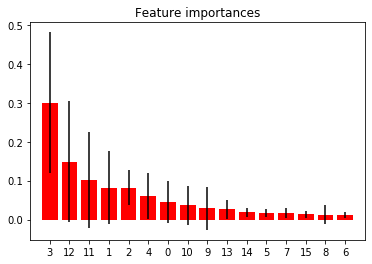

In [78]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## feature 를 줄여보자

* 6, 7, 8, 15

In [79]:
X.shape

(4089, 16)

In [80]:
X_drop_feature = np.delete(X, (6, 7, 8, 15), axis=1)
X_drop_feature.shape

(4089, 12)

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


from sklearn.svm import SVC
svm_clf = SVC(random_state=42, gamma = 0.01)

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(svm_clf, X_drop_feature, train_y.flatten(), cv=skf)

from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_y.flatten(), y_train_pred)
conf_mx

array([[1979,    2,    0,    1,    0],
       [  14, 1590,    0,    6,    3],
       [   1,    0,  142,    0,    0],
       [   2,    5,    0,  203,    0],
       [   0,    1,    0,    0,  140]], dtype=int64)

In [85]:
from sklearn.svm import SVC
from micromlgen import port
svm_clf = SVC(random_state=42, gamma = 0.01).fit(X_drop_feature, train_y.flatten())
print(port(svm_clf))

#pragma once
/**
 * Compute kernel between feature vector and support vector.
 * Kernel type: rbf
 */
double compute_kernel(double x[12], ...) {
    va_list w;
    double kernel = 0.0;
    va_start(w, 12);
    for (uint16_t i = 0; i < 12; i++)
            kernel += pow(x[i] -  va_arg(w, double) , 2);
        kernel = exp(-0.01 * kernel);
    return kernel;
}
/**
 * Predict class for features vector
 */
int predict(double *x) {
    double kernels[345] = { 0 };
    double decisions[10] = { 0 };
    int votes[5] = { 0 };
        kernels[0] = compute_kernel(x,   10.08  , 6.05  , 2.05  , 7.56  , 1.11  , 0.81  , 0.14  , -0.34  , -0.75  , 0.07  , 0.18  , -0.21 );
        kernels[1] = compute_kernel(x,   10.29  , 1.95  , 4.45  , 6.36  , 5.47  , 2.6  , -1.49  , -0.77  , -0.38  , -0.08  , 0.4  , 0.02 );
        kernels[2] = compute_kernel(x,   10.91  , -6.54  , 4.81  , 4.16  , 6.09  , 2.16  , -25.18  , 0.33  , -0.37  , -0.91  , -0.06  , 0.01 );
        kernels[3] = compute_kernel(x,   10.37  , -

gamma가 0.01 이면 kernel 크기 345